# TF-IDF

TF-IDF (Frecuencia de documento de frecuencia de inversión de término) es una técnica de ponderación comúnmente utilizada en el procesamiento de información y la minería de datos. Esta técnica utiliza un método estadístico para calcular la importancia de una palabra en todo el corpus en función del número de veces que la palabra aparece en el texto y la frecuencia de los documentos que aparecen en todo el corpus. Su ventaja es que puede filtrar algunas palabras comunes pero irrelevantes, mientras retiene palabras importantes que afectan todo el texto.

Podemos dividirla en dos partes:
- TF: Frecuancia del termino. Indica con que frecuencia aparece el termino en el documento.
IDF: O frecuencia del termino invertida. Es el número de veces que la palabra aparece en otros documentos. Sirve para mitigar el efecto de palabras demasiado frecuentes y poco especificas del documento en cuestión 

Basicamente la formula es

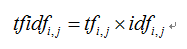

Podemos dividirla entonces en dos pasos:

1. Calcular la frecuencia de palabras en el documento, que basicamnte es el número de veces que una palabra aparece en un documento / número total de palabras

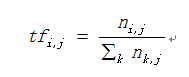

2. Calcula de frecuencia de documentos inversos: IDF = log(nº documentos/ nº doc con la palabra +1)

## Ejemplo

Queremos analizar un articulo, y extraer las palabras más importantes.




TF-IDF con Scikit Learn

### CountVectorizer

La clase CountVectorizer convertirá las palabras del texto en una matriz de frecuencia de palabras.

In [1]:
# coding:utf-8  
from sklearn.feature_extraction.text import CountVectorizer  
 
#Cuerpo  
corpus = [  
    'This is the first document.',  
    'This is the second second document.',  
    'And the third one.',  
    'Is this the first document?',  
]  
#Convierta palabras en texto en matriz de frecuencia de palabras  
vectorizer = CountVectorizer()  
#Cuenta el número de apariciones de una palabra  
X = vectorizer.fit_transform(corpus)  
# Obtenga todas las palabras clave de texto en la bolsa de palabras  
word = vectorizer.get_feature_names_out()  
print(word)
#Ver resultados de frecuencia de palabras  


from sklearn.feature_extraction.text import TfidfTransformer  
 
# Llamada de clase  
transformer = TfidfTransformer()  
print(transformer)
#Cuenta la matriz de frecuencia de palabras X en el valor TF-IDF  
tfidf = transformer.fit_transform(X)  
#Ver estructura de datos tfidf [i] [j] representa el peso tf-idf en el texto de tipo i  
print(tfidf.toarray())


['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
TfidfTransformer()
[[0.         0.43877674 0.54197657 0.43877674 0.         0.
  0.35872874 0.         0.43877674]
 [0.         0.27230147 0.         0.27230147 0.         0.85322574
  0.22262429 0.         0.27230147]
 [0.55280532 0.         0.         0.         0.55280532 0.
  0.28847675 0.55280532 0.        ]
 [0.         0.43877674 0.54197657 0.43877674 0.         0.
  0.35872874 0.         0.43877674]]


In [ ]:

# coding:utf-8  
__author__ = "liuxuejiang"  
import jieba  
import jieba.posseg as pseg  
import os  
import sys  
from sklearn import feature_extraction  
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer  
 
if __name__ == "__main__":  
    corpus=["Vine a la Universidad Tsinghua de Beijing",# El primer tipo de texto después de cortar la palabra, las palabras están separadas por espacios  
        "Vino al edificio NetEase Hangyan",# Resultados de corte de palabras del segundo tipo de texto  
        "Maestría de Xiaoming y Academia de Ciencias de China",# Resultados de corte de palabras del tercer tipo de texto  
        "Me encanta la plaza Tiananmen de Beijing"]# Resultados de corte de palabras del cuarto tipo de texto  
    vectorizer=CountVectorizer()# Esta clase convertirá las palabras del texto en una matriz de frecuencia de palabras. El elemento de matriz a [i] [j] representa la frecuencia de palabras de la palabra j en el tipo i  
    transformer=TfidfTransformer()# La clase contará el peso tf-idf de cada palabra  
    tfidf=transformer.fit_transform(vectorizer.fit_transform(corpus))# El primer fit_transform es calcular tf-idf, el segundo fit_transform es convertir el texto en una matriz de frecuencia de palabras  
    word=vectorizer.get_feature_names_out()# Obtener todas las palabras en el modelo de bolsa de palabras  
    weight=tfidf.toarray()# Extraiga la matriz tf-idf, el elemento a [i] [j] representa el peso tf-idf de la palabra j en el texto de tipo i  
    for i in range(len(weight)):# Imprima los pesos de las palabras tf-idf para cada tipo de texto, el primero para atraviesa todo el texto, el segundo para facilita los pesos de las palabras bajo un cierto tipo de texto  
        print(u"------- la salida aquí",i,u"Pesos de palabra tf-idf para texto ------")
        for j in range(len(word)):
          print(word[j],weight[i][j])


------- la salida aquí 0 Pesos de palabra tf-idf para texto ------
academia 0.0
al 0.0
beijing 0.3655936552175587
china 0.0
ciencias 0.0
de 0.29597957219317683
edificio 0.0
encanta 0.0
hangyan 0.0
la 0.3655936552175587
maestría 0.0
me 0.0
netease 0.0
plaza 0.0
tiananmen 0.0
tsinghua 0.4637091945654711
universidad 0.4637091945654711
vine 0.4637091945654711
vino 0.0
xiaoming 0.0
------- la salida aquí 1 Pesos de palabra tf-idf para texto ------
academia 0.0
al 0.4472135954999579
beijing 0.0
china 0.0
ciencias 0.0
de 0.0
edificio 0.4472135954999579
encanta 0.0
hangyan 0.4472135954999579
la 0.0
maestría 0.0
me 0.0
netease 0.4472135954999579
plaza 0.0
tiananmen 0.0
tsinghua 0.0
universidad 0.0
vine 0.0
vino 0.4472135954999579
xiaoming 0.0
------- la salida aquí 2 Pesos de palabra tf-idf para texto ------
academia 0.3396825906100169
al 0.0
beijing 0.0
china 0.3396825906100169
ciencias 0.3396825906100169
de 0.6504449924339016
edificio 0.0
encanta 0.0
hangyan 0.0
la 0.0
maestría 0.339682590610